In [163]:
import torch
from torch import nn
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [164]:
torch.__version__

'2.5.1+cu118'

fully connected neural network

![alt text](<Screenshot 2024-12-28 180606.png>)

In [165]:
torch.manual_seed(42)

X = np.linspace(0,20,num = 200)

y= X + np.sin(X)*2 + np.random.normal(size=X.shape)

In [166]:
X.shape, y.shape

((200,), (200,))

In [167]:
X[0], y[0]

(0.0, -0.8482675241902451)

In [168]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

<Axes: >

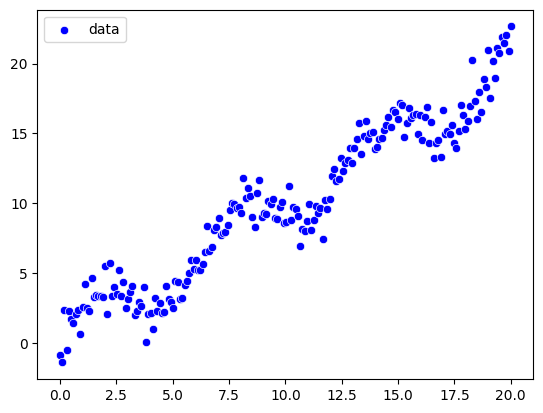

In [169]:
sns.scatterplot(x=X, y=y, color= 'blue', label='data')

In [170]:
from torch.utils.data import Dataset, DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index,:], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [171]:
#example how the class works
df = Simple1DRegressionDataset(X,y)
df[0]

(tensor([0.]), tensor([-0.8483]))

In [172]:
#data loader
training_loader = DataLoader(Simple1DRegressionDataset(X,y), shuffle=True)

In [173]:
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[11.6882]])]

In [174]:
# construct the model using linear block
in_feature = 1
out_feature = 1
model_2 = nn.Linear(in_feature, out_feature)

In [175]:
# loss function
loss_fn = nn.MSELoss()

In [176]:
#optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.010)

In [177]:
# training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                         loss_fn,
                         training_loader,
                         epochs=5,
                         device = 'cpu', 
                         optimizer=optimizer):
    
    optimizer=torch.optim.SGD(params=model.parameters(), lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc='epochs'):

        model=model.train()

        running_loss = 0
        for inputs, labels in tqdm(training_loader, desc = 'batches'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            
            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()

In [178]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [179]:
train_simple_network(model_2,
                    loss_fn,
                    training_loader,
                    device=device,
                    epochs=10)

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [180]:
X.shape

(200,)

In [181]:
# try the model

model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X, dtype=torch.float32).reshape(-1,1)).cpu().numpy()

    

In [182]:
y_pred_m2.shape

(200, 1)

In [183]:
y_pred_m2

array([[ 0.38561872],
       [ 0.47594246],
       [ 0.5662662 ],
       [ 0.65659   ],
       [ 0.7469137 ],
       [ 0.8372375 ],
       [ 0.92756116],
       [ 1.017885  ],
       [ 1.1082087 ],
       [ 1.1985325 ],
       [ 1.2888561 ],
       [ 1.37918   ],
       [ 1.4695036 ],
       [ 1.5598273 ],
       [ 1.6501511 ],
       [ 1.7404749 ],
       [ 1.8307986 ],
       [ 1.9211223 ],
       [ 2.0114462 ],
       [ 2.10177   ],
       [ 2.1920936 ],
       [ 2.2824175 ],
       [ 2.3727412 ],
       [ 2.463065  ],
       [ 2.5533886 ],
       [ 2.6437123 ],
       [ 2.734036  ],
       [ 2.8243597 ],
       [ 2.9146836 ],
       [ 3.0050075 ],
       [ 3.0953312 ],
       [ 3.1856549 ],
       [ 3.2759786 ],
       [ 3.3663023 ],
       [ 3.456626  ],
       [ 3.5469499 ],
       [ 3.6372736 ],
       [ 3.7275972 ],
       [ 3.817921  ],
       [ 3.9082448 ],
       [ 3.9985685 ],
       [ 4.0888925 ],
       [ 4.1792164 ],
       [ 4.26954   ],
       [ 4.3598638 ],
       [ 4

<Axes: >

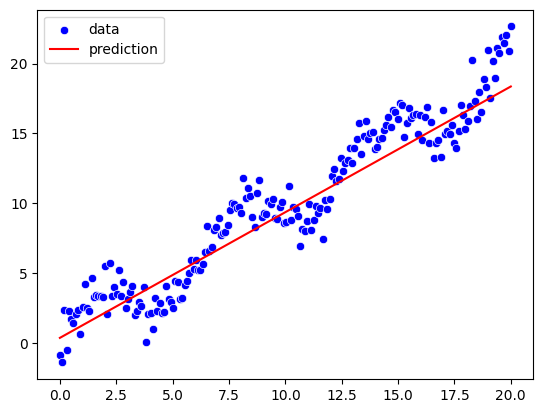

In [184]:
sns.scatterplot(x=X, y= y, color= 'blue', label='data')
sns.lineplot(x=X, y=y_pred_m2.ravel(), color='red', label='prediction')

# ravel is to reshape the 2D array to 1D array for line plot.

In [185]:
# model with two layers nn.Linear(), nn.Linear()
# in_features =  1, out_features = 1 that is the number of perceptrons in the first layer, then in the second layer, it's the number of output features

model_3 = nn.Sequential(
    nn.Linear(1, 5),
    nn.Linear(5,1)
)

In [186]:
train_simple_network(model_3,
                     loss_fn,
                     training_loader)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [187]:
model_3.to('cpu')
model_3.eval()

with torch.inference_mode():
    y_pred_m3 = model_3(torch.tensor(X, dtype=torch.float32).reshape(-1,1)).cpu().numpy()

In [188]:
y_pred_m3.shape


(200, 1)

<Axes: >

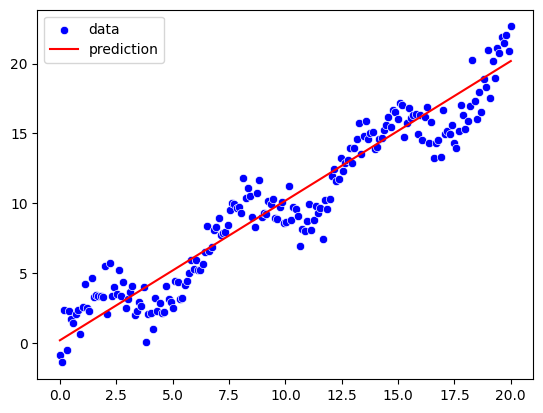

In [189]:
sns.scatterplot(x=X, y= y, color= 'blue', label='data')
sns.lineplot(x=X, y=y_pred_m3.ravel(), color='red', label='prediction')

In [190]:
# model with two layers nn.Linear(), nn.Linear(), activation function nn.Tanh()

model_4 = nn.Sequential(
    nn.Linear(1,10),
    nn.Tanh(),
    nn.Linear(10,1)
)

In [197]:
train_simple_network(model_4,
                     loss_fn,
                     training_loader,
                     epochs=100)

epochs:   0%|          | 0/100 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

batches:   0%|          | 0/200 [00:00<?, ?it/s]

In [198]:
model_4.to('cpu')
model_4.eval()

with torch.inference_mode():
    y_pred_m4 = model_4(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

In [199]:
y_pred_m4.shape

(200, 1)

<Axes: >

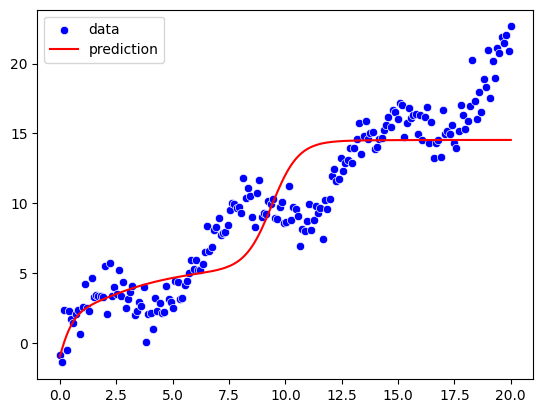

In [200]:
sns.scatterplot(x=X, y= y, color= 'blue', label='data')
sns.lineplot(x=X, y=y_pred_m4.ravel(), color='red', label='prediction')